In [3]:
# -------------------------------------------------------------
# Step 1: Import essential libraries
# -------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing, metrics, linear_model, neighbors, svm, tree, ensemble

In [4]:
# Download dataset directly from Kaggle
!pip install -q kaggle

from google.colab import files
files.upload()   # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mitalidharmveersinha","key":"f5b5874d1156ba4560e8df0e0b6887d7"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d johnsmith88/heart-disease-dataset
!unzip heart-disease-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 26.8MB/s]
Archive:  heart-disease-dataset.zip
  inflating: heart.csv               


In [19]:
# -------------------------------------------------------------
# Step 2: Load and explore dataset
# -------------------------------------------------------------
df = pd.read_csv('heart.csv')
print("Shape of dataset:", df.shape)
print(df.head())
print(df.info())
print("Missing values:\n", df.isnull().sum())

Shape of dataset: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol  

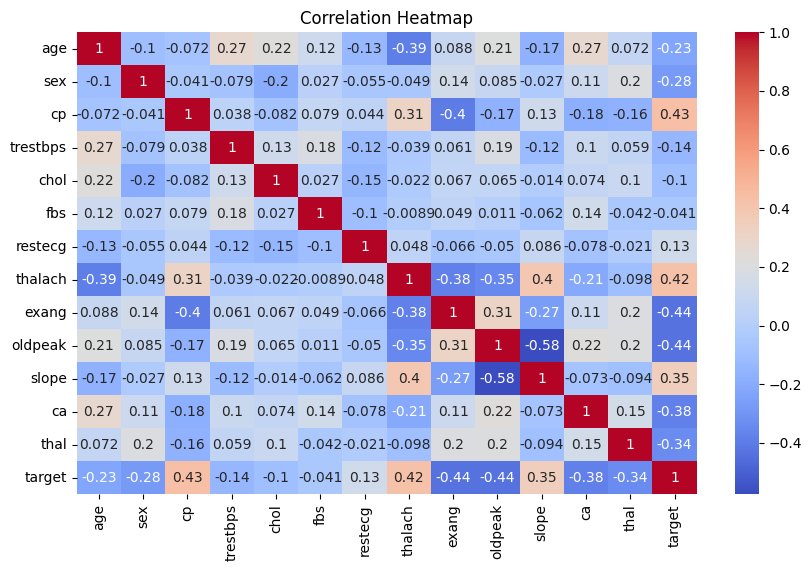

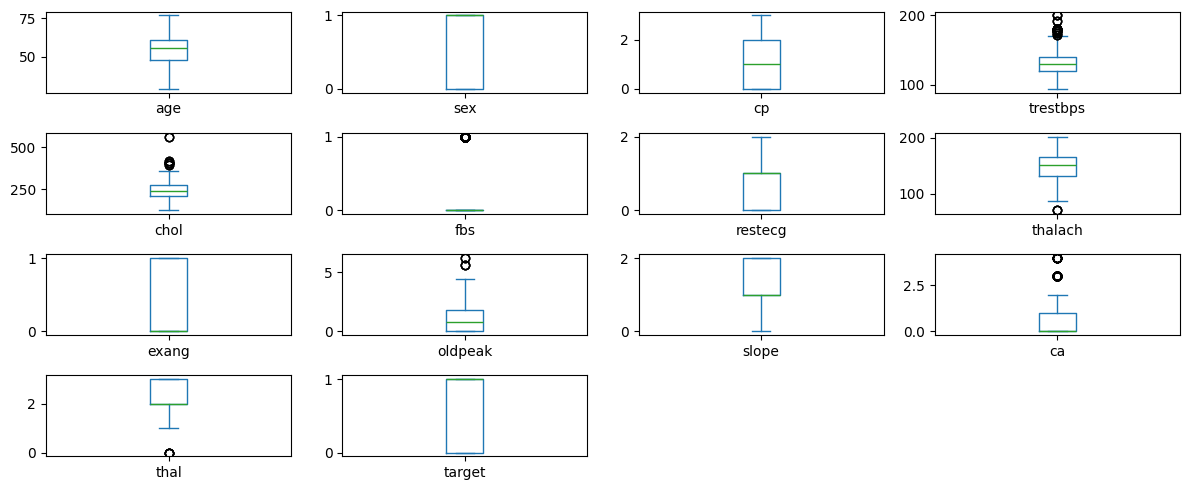

In [7]:
# -------------------------------------------------------------
# Step 3: Data visualization
# -------------------------------------------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

df.plot(kind='box', figsize=(12,5), subplots=True, layout=(4,4))
plt.tight_layout()
plt.show()

In [8]:
# -------------------------------------------------------------
# Step 4: Feature selection and data splitting
# -------------------------------------------------------------
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# -------------------------------------------------------------
# Step 5: Feature scaling
# -------------------------------------------------------------
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# -------------------------------------------------------------
# Step 6: Train and evaluate multiple models
# -------------------------------------------------------------
models = {
    "Logistic Regression": linear_model.LogisticRegression(),
    "KNN": neighbors.KNeighborsClassifier(),
    "SVM": svm.SVC(kernel='linear'),
    "Decision Tree": tree.DecisionTreeClassifier(random_state=42),
    "Random Forest": ensemble.RandomForestClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    results.append([name, acc])
    print(f"\n{name}")
    print(metrics.classification_report(y_test, y_pred))


Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


KNN
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205


SVM
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       102
           1       0.76      0.92      0.83       103

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81

                 Model  Accuracy
0  Logistic Regression  0.795122
1                  KNN  0.834146
2                  SVM  0.814634
3        Decision Tree  0.985366
4        Random Forest  0.985366


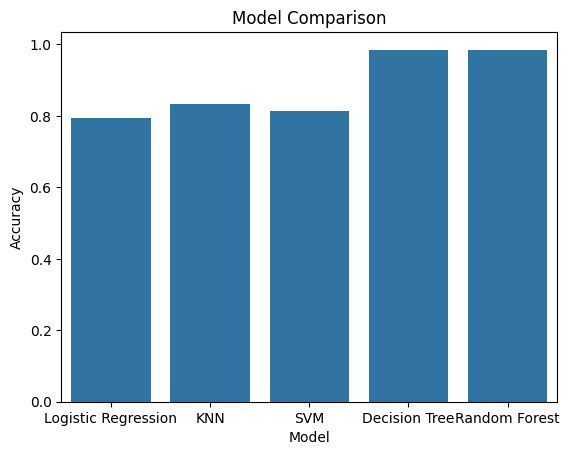


✅ Best Performing Model:
           Model  Accuracy
3  Decision Tree  0.985366
4  Random Forest  0.985366


In [17]:
# -------------------------------------------------------------
# Step 7: Compare model accuracies
# -------------------------------------------------------------
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(results_df)

sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title("Model Comparison")
plt.show()

max_acc = results_df['Accuracy'].max()
best_model = results_df[results_df['Accuracy'] == max_acc]
print("\n✅ Best Performing Model:")
print(best_model)